## Imports

In [1]:
import itertools

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
from pathlib import Path
import urllib.request
import zipfile

# zip_url =  "https://www.statlearning.com/s/ALL-CSV-FILES-2nd-Edition-corrected.zip"
# zip_filename = "ALL-CSV-FILES-2nd-Edition-corrected.zip"

# urllib.request.urlretrieve(zip_url, zip_filename)

# with zipfile.ZipFile(zip_filename, 'r') as archive:
#     archive.printdir()

# with zipfile.ZipFile(zip_filename, 'r') as archive:
#     archive.extract('ALL CSV FILES - 2nd Edition/Hitters.csv')
#     Path('ALL CSV FILES - 2nd Edition/Hitters.csv').rename('Hitters.csv')
#     print('Done!')

## Load Data

In [3]:
hitters_df = pd.read_csv('Hitters.csv')
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
hitters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
hitters_df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
hitters_df = hitters_df.dropna()

In [7]:
quantitative_cols = hitters_df.select_dtypes(include=['number']).dtypes.index.tolist()
quantitative_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [8]:
qualitative_cols = hitters_df.select_dtypes(include=['category', 'object']).dtypes.index.tolist()
qualitative_cols

['League', 'Division', 'NewLeague']

In [9]:
response = 'Salary'
predictors = list(set(quantitative_cols) - set([response]))

In [10]:
y = hitters_df[response]
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

## Forward Selection

In [11]:
unused_features = predictors[:]
used_features = []
errors = []
model_stats = []

while unused_features:
    current_models = []
    for feature in unused_features:
        current_features = used_features + [feature]
        X = hitters_df[current_features]
        model = LinearRegression()
        model.fit(X, y)
        y_hat = model.predict(X)
        # number of rows
        n = X.shape[0]
        # number of columns
        k = len(model.coef_)
        # degrees of freedom
        dof = n - (k + 1)
        # rss
        rss = np.power(y - y_hat, 2).sum()
        # tss
        tss = np.power(y - y.mean(), 2).sum()
        # adjusterd R^2
        adj_r_2 = 1 - (rss/tss)*(n-1)/dof
        current_models.append((feature, adj_r_2))
    
    current_models = sorted(current_models, reverse=True, key=lambda tup: tup[1])
    best_model = current_models[0][0]
    best_error = current_models[0][1]
#     print(best_model)
#     break
    unused_features.remove(best_model)
    used_features.append(best_model)
    errors.append(best_error)
#     print(f'unused: {unused_features}, used: {used_features}')
    model_stats.append((len(used_features), used_features[:], best_error))
    print(used_features)
        
        


['CRBI']
['CRBI', 'Hits']
['CRBI', 'Hits', 'PutOuts']
['CRBI', 'Hits', 'PutOuts', 'AtBat']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun', 'CHits']
['CRBI', 'Hits', 'PutOuts', 'AtBat', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists', 'Runs', 'Errors', 'HmRun', 'CHits', 'Years']
['CRBI', 'Hits', 

In [12]:
stats_df = pd.DataFrame(model_stats, columns=['cnt', 'columns', 'adj_r_2'])
stats_df

,cnt,columns,adj_r_2
0,1,[CRBI],0.318850
1,2,"[CRBI, Hits]",0.420802
2,3,"[CRBI, Hits, PutOuts]",0.445075
3,4,"[CRBI, Hits, PutOuts, AtBat]",0.462159
4,5,"[CRBI, Hits, PutOuts, AtBat, Walks]",0.480505
5,6,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks]",0.481896
6,7,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.496239
7,8,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.503651
8,9,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.508641
9,10,"[CRBI, Hits, PutOuts, AtBat, Walks, CWalks, CR...",0.507753


In [13]:
best_idx = stats_df['adj_r_2'].idxmax()
best_idx

8

In [14]:
stats_df.loc[best_idx, 'cnt'], stats_df.loc[best_idx, 'adj_r_2']

(9, 0.5086408324706606)

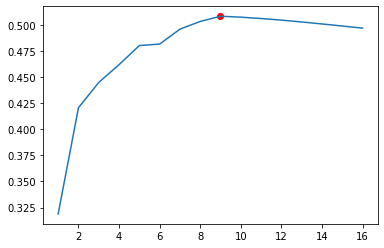

In [15]:
plt.plot(stats_df['cnt'], stats_df['adj_r_2'])
plt.scatter(x=stats_df.loc[best_idx, 'cnt'], y=stats_df.loc[best_idx, 'adj_r_2'], c='r')
plt.show()

## Backward Selection

In [28]:
features = predictors[:]
print(features)

current_models = []
for item in features:
    features.pop()
    current_features = features
    X = hitters_df[current_features]

    model = LinearRegression()
    model.fit(X, y)
    y_hat = model.predict(X)
    # number of rows
    n = X.shape[0]
    # number of columns
    k = len(model.coef_)
    # degrees of freedom
    dof = n - (k + 1)
    # rss
    rss = np.power(y - y_hat, 2).sum()
    # tss
    tss = np.power(y - y.mean(), 2).sum()
    # adjusterd R^2
    adj_r_2 = 1 - (rss/tss)*(n-1)/dof
    current_models.append((feature, adj_r_2))
current_models

['CRuns', 'CHmRun', 'AtBat', 'CWalks', 'PutOuts', 'HmRun', 'CHits', 'Assists', 'Hits', 'RBI', 'Runs', 'CAtBat', 'CRBI', 'Errors', 'Walks', 'Years']


[('RBI', 0.4991744631373515),
 ('RBI', 0.4785621640677833),
 ('RBI', 0.479075665468929),
 ('RBI', 0.4798342367584315),
 ('RBI', 0.46908273021200997),
 ('RBI', 0.46947977231768245),
 ('RBI', 0.46865452031941823),
 ('RBI', 0.4212192129633199)]